# Taek Soo Nam

## CS344 (Final Project)

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Setting figure size and using ggplot for plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [11]:
# Import dataset
data = pd.read_csv('Cluster Analysis.csv', encoding='cp1252')
print(data.shape)
print(data.head())

(6211, 24)
                   AcuGroupName           SrmDeletionReason  \
0                     Blue Hill      Administrative Changes   
1       XL Global Services, Inc  Customer Removing Hardware   
2                  RR Donnelley      Administrative Changes   
3  TierPoint Partnership Parent   Customer Keeping Hardware   
4    Sears Holdings Corporation  Customer Removing Hardware   

        SrmDeletionReason2                             SrmDeletionReasonNotes  \
0   Administrative Changes                      9% Customer Loyalty Discount.   
1  Decommissioned Hardware                                     Decommissioned   
2   Administrative Changes             8% discount approved at renewal time.    
3          Competitive OEM  4.20.18 - Per Chris, TierPoint moving these ba...   
4  Decommissioned Hardware  Did not replace servers. Hitachi AMS (x2) will...   

   SystemRevenue  StorageRevenue  NetworkRevenue  OtherRevenue  VMAXRevenue  \
0      406020.60       566390.59        1361

In [12]:
# Rearranging the data to array
f1 = data['COGSPercent'].values
f2 = data['DeletionPercent'].values
X = np.array(list(zip(f1,f2)))

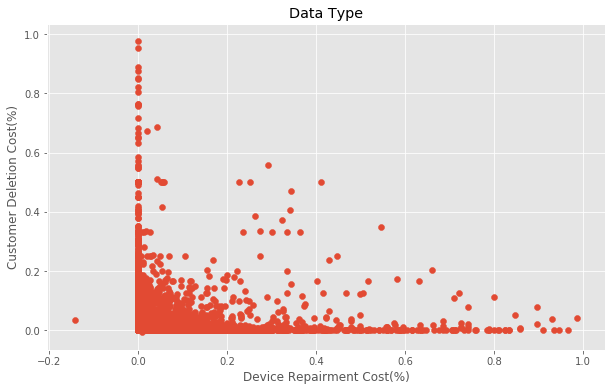

In [13]:
# Showing the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Device Repairment Cost(%)')
plt.ylabel('Customer Deletion Cost(%)')
plt.title('Data Type')
plt.show()

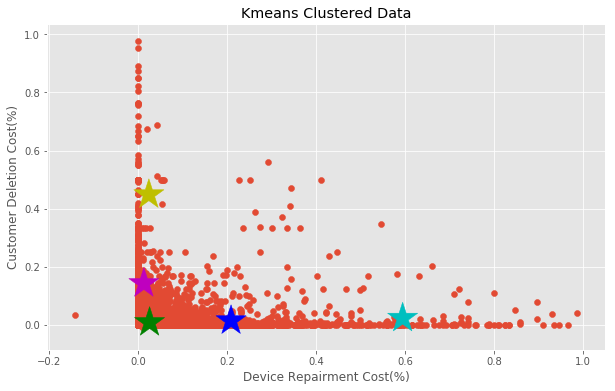

In [14]:
# Initializing KMeans with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fitting with inputs
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)

# Getting the cluster centers/centroids
C = kmeans.cluster_centers_
fig = plt.figure()

# Setting colors for centroids
colors = ['g', 'b', 'y', 'c', 'm']

# Plotting the graph with calculated centroids
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colors, s=1000)
plt.xlabel('Device Repairment Cost(%)')
plt.ylabel('Customer Deletion Cost(%)')
plt.title('Kmeans Clustered Data')
plt.show()

In [ ]:
# Converting back the data to data frame with assigned clusters (0~4).
cluster = kmeans.labels_
ang = pd.DataFrame(data)
ang['cluster'] = np.nan
ang['cluster'] = cluster

# Output
ang.to_csv('./Kmeans Output', sep=',', index=False)

In [15]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text

In [18]:
# Import each cluster dataset from Kmeans Output
dataset0 = pd.read_csv('Cluster 0.csv')
dataset1 = pd.read_csv('Cluster 1.csv')
dataset2 = pd.read_csv('Cluster 2.csv')
dataset3 = pd.read_csv('Cluster 3.csv')
dataset4 = pd.read_csv('Cluster 4.csv')

documents = dataset0
no_features = 1000

# Downloading stopwords from nltk
nltk.download('stopwords')
stop_words = stopwords.words("english")

# Adding stopwords
more_stop = ['18', 'decommissioned', 'customer', 'longer', 'kb']
stop_words.extend(more_stop)


# LDA
tf_vectorizer = CountVectorizer(max_df=1, min_df=1, max_features=no_features, stop_words=text.ENGLISH_STOP_WORDS.union(stop_words))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

# Choosing number of topics
no_topics = 5


# RUN LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=10, learning_method='online', learning_offset=50., random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsnam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Topic 0:
downreplaced vnx5300customer items audit turned demmissioneddecommissioned1 17 incorrect node cancelled
Topic 1:
equipment added workload effective using wade new time 194 ams
Topic 2:
equipment agreement hardware new ck service replacing warranty added servers
Topic 3:
swcustomer opportunity 157 paid came new buy richmond joel hopefully
Topic 4:
user hardware philips purposed cancel equipmentdecommissioned3 13server starting correction cost


C:\Users\tsnam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
downreplaced vnx5300customer items audit turned demmissioneddecommissioned1 17 incorrect node cancelled

Topic 1:
equipment added workload effective using wade new time 194 ams

Topic 2:
equipment agreement hardware new ck service replacing warranty added servers

Topic 3:
swcustomer opportunity 157 paid came new buy richmond joel hopefully

Topic 4:
user hardware philips purposed cancel equipmentdecommissioned3 13server starting correction cost

**Topic 0:
user know renewingnot jeff year reason continue equipment stored discuss**

**Topic 1:
equipment renew house month 16 providers kbcustomer support sparc rpper**

**Topic 2:
equipment end partner renewing renew techdata agreements service sei candace**

**Topic 3:
emails deleting future hardwarethis transition end emc process gary surgery**

**Topic 4:
equipment user renewing renew end agreement techdata hardware partner said**

Topic 0:
wlcgtc01 use moved 309 higherno gear11 maintenance engine local 10

Topic 1:
hi exec sghas opp power results 16 items soon neededowned

Topic 2:
user sales productions ken kb12 domains storage supportremoving maintained 
hardwarethere

Topic 3:
agreement agmt equipment cisco delete k9 server oem service techdata

Topic 4:
agreement 250 cranel moved discount brought scanners remaining add thank

**Topic 0:
10 bvcustomer sis agreement datablue refreshed 17 terri gartner way**

**Topic 1:
equipment agreement partner service hardware said 10 renewing oem park**

**Topic 2:
partner equipment service agreement refreshed hardware data moving replaced renewal**

**Topic 3:
equipment pay scaws expiration came bvgreat kbrefreshed gear decision great**

**Topic 4:
equipment agreement partner hardware 10 warranty service place 8217 agmt**

Topic 0:
equipment new gear replaced removed replacing hardware added agreement servers

Topic 1:
ryan robert based sites services said utilizing com12 replaced replacereplaced

Topic 2:
equipment hp replacing service new hardware agreement using netapps geardecommissionedcustomer

Topic 3:
equipment replaced servers reduce solaris location budget licenses added blade

Topic 4:
equipment new added gear replacing hardware agreement removed servers using
